<img src='https://camo.githubusercontent.com/175fa296ff3ddb5a764a788aee45420ba6189ff2dfa28076122797af89599599/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d3153415142706f71477a42354354396c77786a3154306830715655357036736457' width=200 style="float:center">

# MatplotLib
---

**Índice:**
1. [Exercício 1](#Exercício-1)
2. [Exercício 2](#Exercício-2)
3. [Exercício 3](#Exercício-3)
4. [Exercício 4](#Exercício-4)
5. [Exercício 5](#Exercício-5)
6. [Exercício 6](#Exercício-6)
7. [Exercício 7](#Exercício-7)
8. [Exercício 8](#Exercício-8)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Exercício 1
* Teste outras cores e formatos para o exemplo dado.
* Altere o número de pontos.
* Plote as funções seno e cosseno no mesmo gráfico, em cores e formatos diferentes.
* Plote as funções cosseno e tangente de forma que as cores e formatos de cada plot sejam distintas. Varie o número de pontos usados na geração dos gráficos.
* Salve os gráficos resultantes em arquivos.

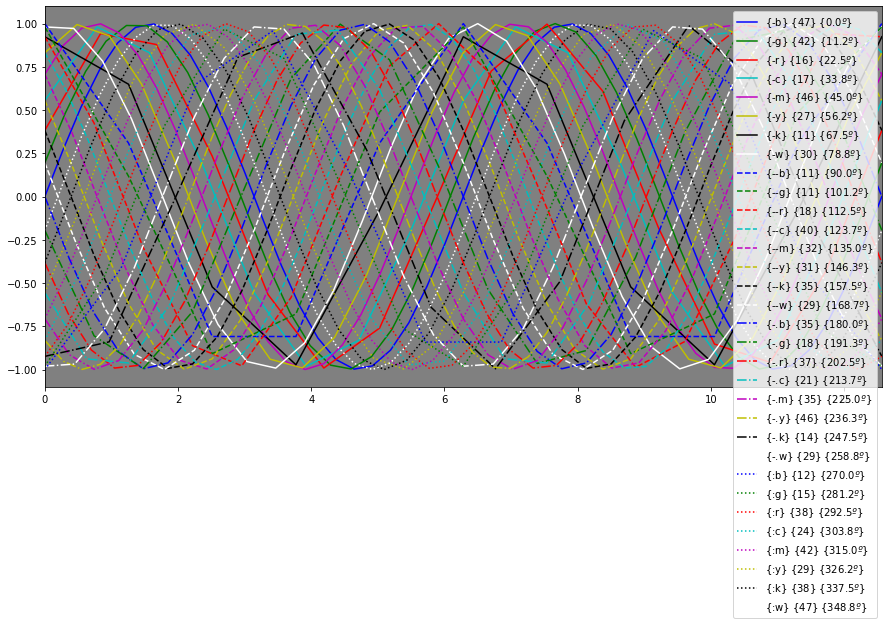

In [24]:
# tipos de traços
dashes = ['-', '--', '-.', ':']
# atalho para cores
colors = list('bgrcmykw')

nums = np.random.randint(10, 50, len(dashes) * len(colors))
styles = []
for i in dashes:
    for j in colors:
        styles.append(i + j)

fig, ax = plt.subplots(figsize=(15, 7))
for i, num in enumerate(nums):
    x = np.linspace(0, 4 * np.pi, num)
    t = i * 2 * np.pi / len(nums)
    
    y = np.sin(x + t)
    
    ax.plot(x, y, styles[i],
            label='{%s} {%d} {$%4.1fº$}' % (styles[i], num, t*180/np.pi))

ax.set_facecolor('gray')
ax.set_xlim(0, 4 * np.pi)
plt.legend()
plt.show()

## Exercício 2
Crie um array com números do intervalo $[0., 5.)$ ($step = 0.2$), e plote as funções da tabela abaixo, inclua os rótulos e legendas conforme julgar necessário.

|Função|Formato|
|-|-|
|$$f(x) = x$$|traços vermelhos|
|$$g(x) = x^2$$|quadrados azuis|
|$$h(x) = x^3$$| triângulos verdes|

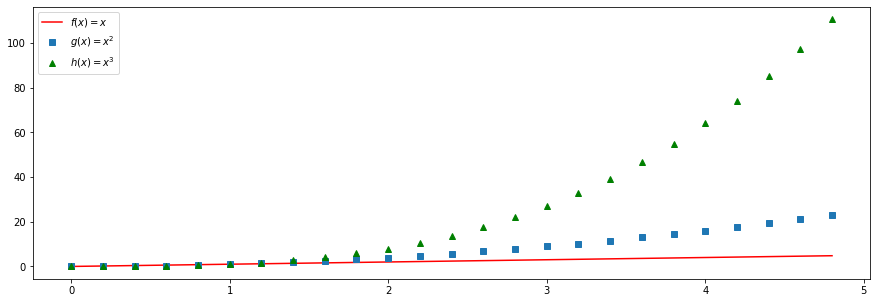

In [27]:
x = np.arange(0, 5, .2)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, x, '-r', label='$f(x)=x$')
ax.plot(x, x**2, 's', label='$g(x)=x^2$')
ax.plot(x, x**3, '^g', label='$h(x)=x^3$')
ax.legend()
plt.show()

## Exercício 3
Considerando que você está usando $100$ pontos no intervalo $[−10,10]$, plote as funções $seno$ e $cosseno$ considerando:
* Figura:
    * título: "Seno e Cosseno"
    * legenda: $[y = \sin{(x)},\ y = \cos{(x)}]$
    * traços de y: $[-1,\ 0,\ 1]$
    * tamanho: $(20,\ 5)$
* Seno
    * tracejado vermelho
* Cosseno
    * linha cheia verde

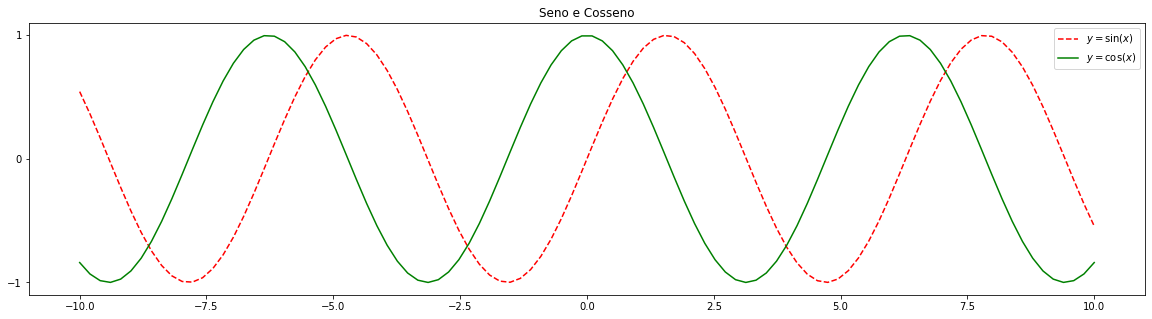

In [30]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y, '--r',
        label='$y = \sin{(x)}$')
ax.plot(x, z, 'g',
        label='$y = \cos{(x)}$')
ax.set_yticks([-1, 0, 1])
ax.legend()
ax.set_title('Seno e Cosseno')
plt.show()

## Exercício 4
Faça o gráfico de $y = x^2$ onde, para $x < 0$ a linha é tracejada vermelha e para $x \ge 0$ a linha é cheia e azul. Coloque rótulos e legendas.

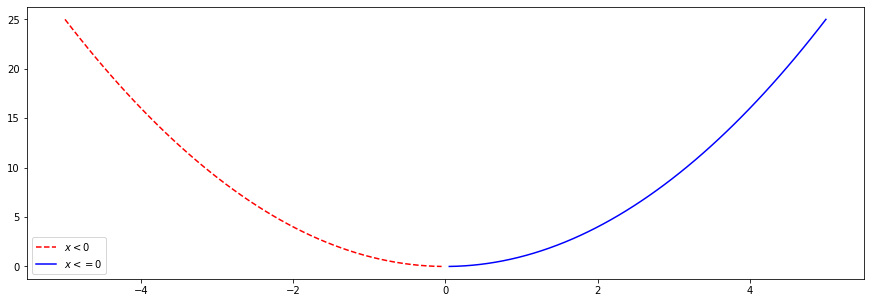

In [45]:
x = np.linspace(-5, 5, 100)
y = x**2

# criando uma máscara booleana para encontrar os pontos onde x < 0
mask = x < 0

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x[mask], y[mask], '--r',
        label='$x < 0$')
ax.plot(x[~mask], y[~mask], 'b',
        label='$x <= 0$')
ax.legend()
plt.show()

## Exercício 5
Considere as seguintes informações:
* $x \in [-10,\ 10]$
* $len{(x)} = 100$
* $y = x^3$
* Cor da linha do gráfico
    * $-3 \le x \le 3$ - Vermelha
    * Caso contrário - Azul

Crie este gráfico com legenda e para diferenciar os intervalos coloridos de maneira diferente.

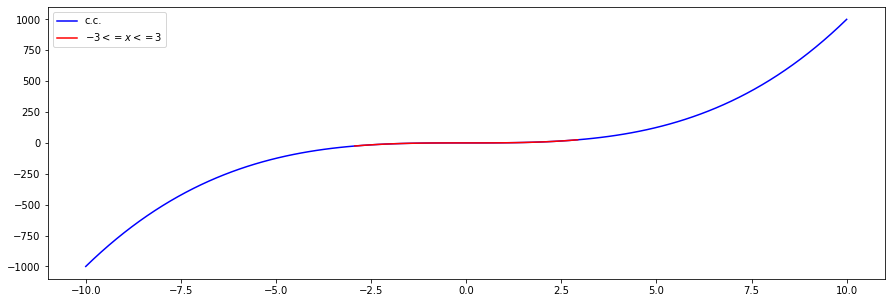

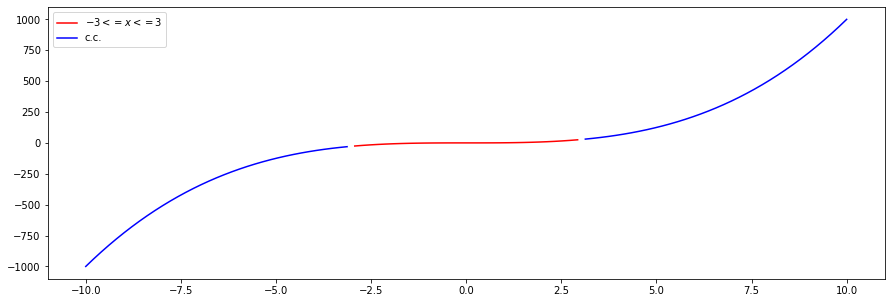

In [71]:
x = np.linspace(-10, 10, 100)
y = x**3

# criando máscaras booleanas para encontrar os pontos onde -3 <= x <= 3
mask1 = (x >= -3)
mask2 = (x <= 3)

## Primeira forma
fig, ax = plt.subplots(figsize=(15, 5))
# Neste caso, pintamos por baixo a curva azul para que a curva vermelha
# encubra o trecho diferente
ax.plot(x, y, 'b',
        label='c.c.')
ax.plot(x[mask1 & mask2], y[mask1 & mask2], 'r',
        label='$-3 <= x <= 3$', )
ax.legend()
plt.show()

## Segunda forma
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x[mask1 & mask2], y[mask1 & mask2], 'r',
        label='$-3 <= x <= 3$')
# Neste caso, transformamos em np.nan o intervalo que deve ser vermelho
x_aux = x.copy()
y_aux = y.copy()
x_aux[mask1 & mask2] = np.nan
y_aux[mask1 & mask2] = np.nan
ax.plot(x_aux, y_aux, 'b',
        label='c.c.')
ax.legend()
plt.show()

## Exercício 6
Três medidores de nível (`LT-01`, `LT-02`, `LT-03`) são instalados em um tanque. Cada um deles tem um princípio de funcionamento diferente. Também são diferentes os erros de medição.
* Crie uma função que plote as 3 medições de nível no intervalo de tempo $t_0 \rightarrow t_1$ - `plotar_niveis(t_0, t_1)`
* Disponibilize uma entrada para função que controle se o resultado irá ser plotado em um só gráfico ou em três subplots em linha - `plotar_niveis(t_0, t_1, subplots=False)`
* Gere `boxplots` para os dados em uma mesma escala de "y" compare o desempenho dos medidores em termo de precisão e exatidão. Observe que o período mais transitório pode poluir o boxplot, tente removê-lo!

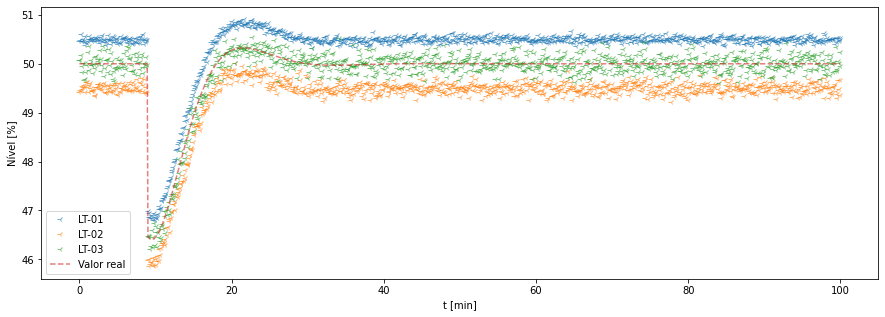

In [72]:
t = np.linspace(0, 100, 1000) # tempo de 0 a 100
nivel_inicial = 50 # nível em 50%
instante = 9

nivel_real = np.ones_like(t)*nivel_inicial 
nivel_real[t > instante] = 50 + 5*np.exp(-(t[t > instante] - instante)/5)*np.cos(np.pi*(t[t > instante])/12)

def medidor(valor, erro=0, bias=0):
    return valor + erro*np.random.randn(len(valor)) + bias*valor

LT01 = medidor(nivel_real, .05, .01)
LT02 = medidor(nivel_real, .10, -.01)
LT03 = medidor(nivel_real, .15)

plt.subplots(figsize = (15, 5))
plt.plot(t, LT01, '3',
         t, LT02, '3',
         t, LT03, '3',
         t, nivel_real, '--',
         alpha=.6)
plt.ylabel('Nível [%]')
plt.xlabel('t [min]')
plt.legend(['LT-01', 'LT-02', 'LT-03', 'Valor real'])
plt.show()

In [111]:
def filtrar(t_0, t_1):
    # Gerando os arrays do trecho entre t0 e t1
    mask = (t >= t_0) & (t <= t_1)
    t_aux = t[mask]
    # Empilhando os LTs para evitar digitar três plots e facilitar a filtragem
    LT_aux = np.vstack((LT01, LT02, LT03))[:, mask]
    return t_aux, LT_aux

def plotar_niveis(t_0, t_1, subplots=False):
    t_aux, LT_aux = filtrar(t_0, t_1)

    if subplots:
        fig, axs = plt.subplots(3, 1, figsize = (15, 6), sharex=True)
        for i, ax in enumerate(axs):
            ax.plot(t_aux, LT_aux[i, :], '--',
                    alpha=.6)
            ax.legend([f'LT-0{i + 1}'])
            ax.set_ylabel('Nível [%]')
    else:
        fig, ax = plt.subplots(figsize = (15, 5))
        ax.plot(t_aux, LT_aux.T, '--',
                alpha=.6)
        ax.legend(['LT-01', 'LT-02', 'LT-03'])
        ax.set_ylabel('Nível [%]')
    plt.xlabel('t [min]')
    plt.show()

Plotando no mesmo gráfico.

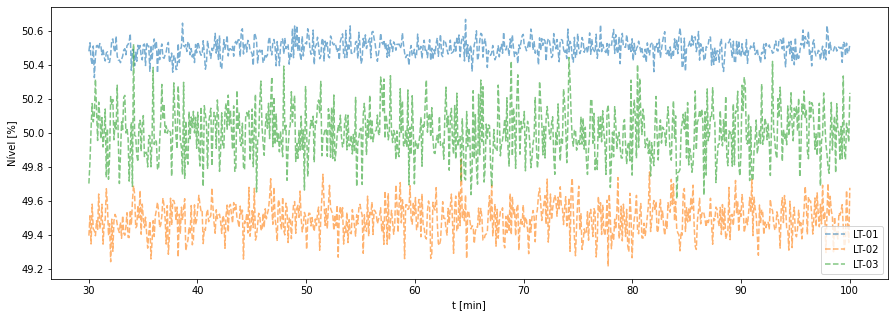

In [119]:
plotar_niveis(30, 100)

Plotando em subplots.

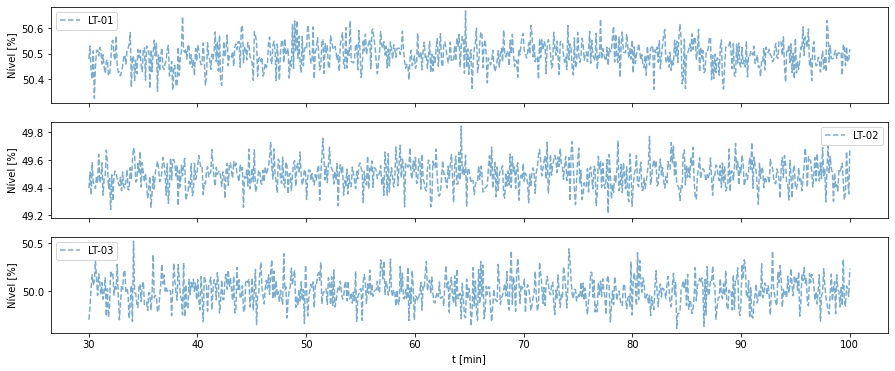

In [120]:
plotar_niveis(30, 100, subplots=True)

Boxplot dos dados completos.

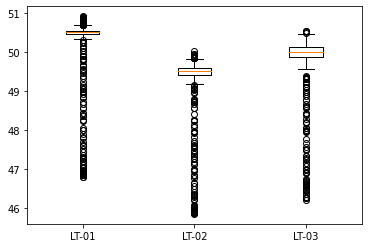

In [121]:
fig, ax = plt.subplots()
ax.boxplot((LT01, LT02, LT03))
ax.set_xticklabels(['LT-01', 'LT-02', 'LT-03'])
plt.show()

Boxplot dos dados filtrando o transitório

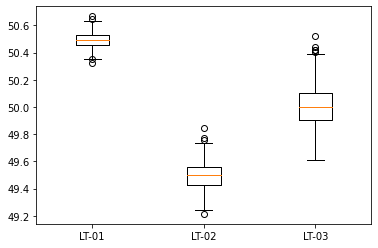

In [122]:
_, LT_aux = filtrar(30, 100)
fig, ax = plt.subplots()
ax.boxplot(LT_aux.T)
ax.set_xticklabels(['LT-01', 'LT-02', 'LT-03'])
plt.show()

## Exercício 7
De acordo com o [g1](https://g1.globo.com/economia/noticia/2020/09/17/fome-no-brasil-em-5-anos-cresce-em-3-milhoes-o-no-de-pessoas-em-situacao-de-inseguranca-alimentar-grave-diz-ibge.ghtml), apesar de ter sido reduzida desde 2004, a situação da fome no Brasil começou a se agravar a partir de 2013:

![image](https://s2.glbimg.com/__3k-cr7UZSxaZhVUKECdRfKs54=/0x0:1340x490/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2020/6/i/gVItuyTpOvB6BNotz6QA/vtzhh-font-style-vertical-align-inherit-font-style-vertical-align-inherit-n-mero-de-pessoas-que-passam-fome-no-brasil-font-font-.png)

|Ano|Insegurança <br> alimentar [milhares]|
|-|-:|
|2004|14998|
|2009|11292|
|2013|7225|
|2018|10284|

De acordo com a [EBC](https://agenciabrasil.ebc.com.br/geral/noticia/2021-04/pesquisa-revela-que-19-milhoes-passaram-fome-no-brasil-no-fim-de-2020) o número só piora, chegando a 19 milhões de pessoas com insegurança alimentar grave ao final de 2020.

* Complete o gráfico de barras horizontais criado pelo G1 acrescentando os dados de 2020.

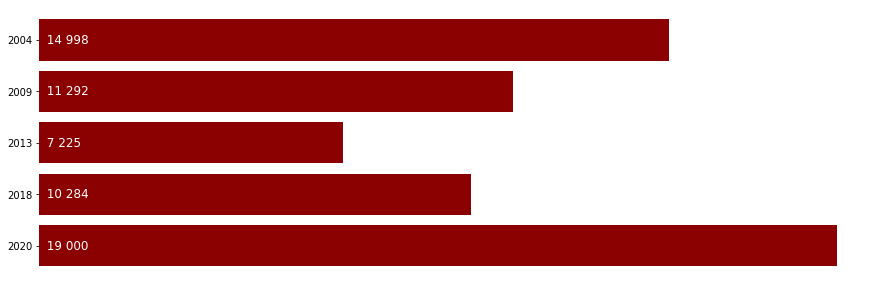

In [180]:
x = ['2004', '2009', '2013', '2018', '2020']
y = [14998, 11292, 7225, 10284, 19000]

fig = plt.figure(figsize=(15,5))
ax = plt.barh(x[::-1], y[::-1], facecolor='darkred')

for i in range(len(y)):
    txt = lambda x: '  %s %s' % (str(x)[:-3], str(x)[-3:])
    plt.annotate(
        txt(y[-i-1]), (0, i),
        color='white', fontsize=12, va='center', # text parameters
)
plt.box(False) # apagando o quadrado do plot
plt.xticks([])
plt.show()

## Exercício 8
Gere um gráfico de pizza com uma carteira de investimentos que possui:
* LCA/LCI: R\$ 3000,00
* Ações: R\$ 8000,00
* CDB: R\$ 2000,00
* Tesouro: R\$ 2500,00
* Poupança: R\$ 12500,00

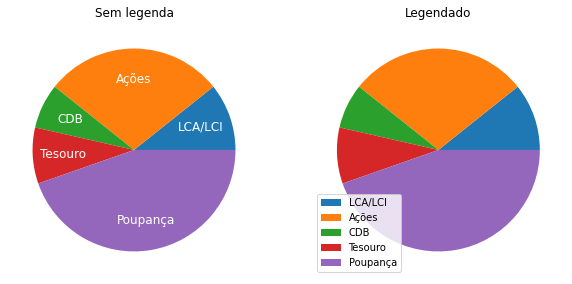

In [197]:
labels = ['LCA/LCI', 'Ações', 'CDB', 'Tesouro', 'Poupança']
x = [3000, 8000, 2000, 2500, 12500]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pie(x, labels=labels, labeldistance=.7,
        textprops={'color': 'white', 'fontsize': 12, 'ha': 'center'})
ax[0].set_title('Sem legenda')

ax[1].pie(x)
ax[1].legend(labels)
ax[1].set_title('Legendado')

plt.show()